## DSC 630
### Week 3: Assignment 3.2
**Author:** Kimberly Cable<br>
**Date:** 

### 3.2 Assignment: Using Data to impove MLB Attendance

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

Questions:
* Does attendance go up if its a night game versus a day game?
* Does attendance go up if the temperature is in the 80s?
* Does the day of the week affect the attendance at a game?
* Is attendance affected by a promotion? and which promotion?

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Read data file
try:
    dodgers_df = pd.read_csv("data/dodgers-2022.csv")
except Exception:
    print("There was an error reading the Dodgers file")
    
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


#### Descriptive Statistics

In [3]:
dodgers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


In [4]:
dodgers_df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [5]:
dodgers_df.describe(include = ['O'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Tuesday,Giants,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


Preliminary, looking at the descriptive analysis we can see that there were
* 7 months that games were played with May being the top month
* Tuesday seems to be the top day of the week to play baseball
* The Dodgers played 16 different opponents
* Games were mostly at night when it was clear
* The average temperature was 73 degrees
* The average attendance was 41,040 with a maximum attendance of 56,000 (the stadiums capacity)

#### Find out how many games each promotion was held

In [6]:
# Get the number of games the Cap promotion was held
dodgers_df['cap'].value_counts()

NO     79
YES     2
Name: cap, dtype: int64

In [7]:
# Get the number of games the shirt promotion was held
dodgers_df['shirt'].value_counts()

NO     78
YES     3
Name: shirt, dtype: int64

In [8]:
# Get the number of games fireworks were displayed
dodgers_df['fireworks'].value_counts()

NO     67
YES    14
Name: fireworks, dtype: int64

In [9]:
# Get the number of games the Bobblehead promotion was held
dodgers_df['bobblehead'].value_counts()

NO     70
YES    11
Name: bobblehead, dtype: int64

The was only 2 games (2%) the Cap promotion was held and only 3 games (3.7%) the Shirt promotion was held
The Fireworks were held on 14 games (17%) and the Bobblehead promotion was 11 games (13.5%).

#### Check for Null Values

In [10]:
dodgers_df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

#### Add new feature for if there was a promotion or not

In [11]:
def promotion(row):
    if (row['cap'] == 'YES') or (row['shirt'] == 'YES') or (row['fireworks'] == 'YES') or (row['bobblehead'] == 'YES'):
        return 1
    else:
        return 0

In [12]:
dodgers_df['promotion'] = dodgers_df.apply(promotion, axis = 1)
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,promotion
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,1
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,0


#### Histogram of Attendance

C:\Users\Osgiliath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


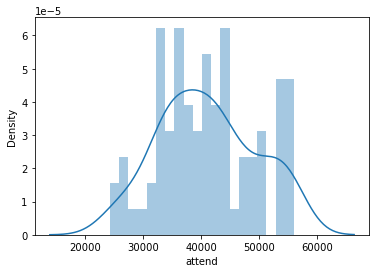

In [13]:
X = dodgers_df['attend']

sns.distplot(X, kde=True, bins=20, hist=True)
plt.show()

Attendance looks like a normal distribution

#### Visualizations: Look at attendance against the different features

*Attendance by Month*

In [14]:
# Group Attendance by Month and Day or Night Game
month_games = dodgers_df.groupby(['month', 'promotion'])['attend'].sum().unstack().fillna(0)
print(month_games)

promotion         0         1
month                        
APR        295700.0  179403.0
AUG        312169.0  329104.0
JUL        233079.0  293532.0
JUN        186425.0  245039.0
MAY        461229.0  210994.0
OCT        110111.0       0.0
SEP        349542.0  117919.0


Text(0.5, 1.0, 'Attendance by Month')

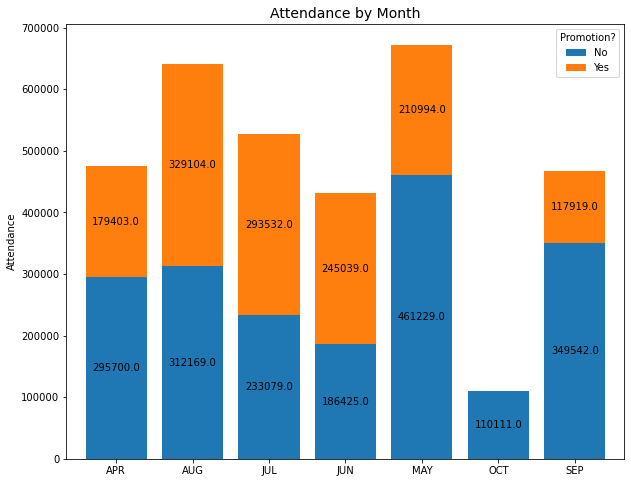

In [15]:
# Plot figure
ax = month_games.plot(kind='bar', stacked=True, figsize=(10, 8), rot=0, xlabel='', ylabel='Attendance', width = 0.8)

for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type='center')
    
ax.legend(labels = ['No', 'Yes'], title = 'Promotion?')
ax.set_title('Attendance by Month', fontsize = 14)

May had the highest attendance but there were less promotions in May. August saw almost equal between the number of promotions and not having promotions and was second in total monthly attendance.

#### Attendance by Day of the Week

In [16]:
# Group Attendance by Day of the Week and if there was a promotion
day_of_week_games = dodgers_df.groupby(['day_of_week', 'promotion'])['attend'].sum().unstack().fillna(0)
print(day_of_week_games)

promotion           0         1
day_of_week                    
Friday            0.0  521520.0
Monday       369029.0   50559.0
Saturday     451692.0  108256.0
Sunday       402888.0  146607.0
Thursday      98410.0  103627.0
Tuesday      228784.0  391852.0
Wednesday    397452.0   53570.0


Text(0.5, 1.0, 'Attendance by Day of the Week')

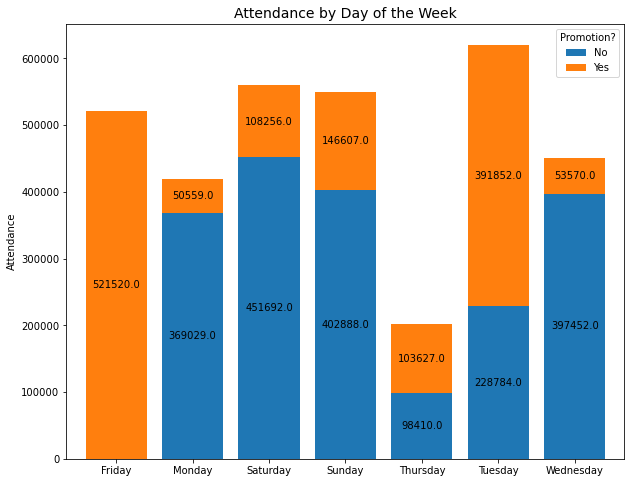

In [17]:
# Plot figure
ax = day_of_week_games.plot(kind='bar', stacked=True, figsize=(10, 8), rot=0, xlabel='', ylabel='Attendance', width = 0.8)

for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type='center')
    
ax.legend(labels = ['No', 'Yes'], title = 'Promotion?')
ax.set_title('Attendance by Day of the Week', fontsize = 14)

Tuesdays had the highest attendance and more games with a promotion.  Fridays were all promotion games and had a good attendance record.

#### Attendance by Temperature

Text(0.5, 1.0, 'Attendance by Temperature')

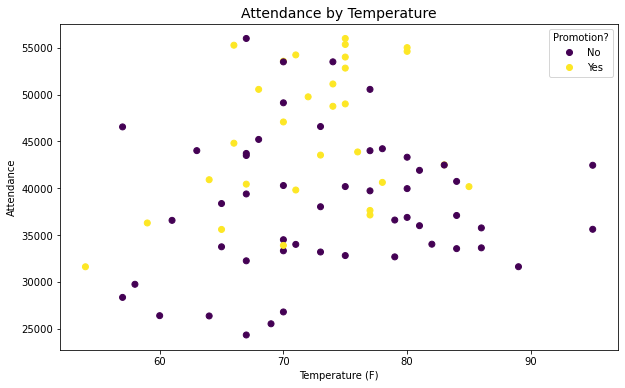

In [18]:
# Plot attendance by day of the week
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x = dodgers_df['temp'], y = dodgers_df['attend'],
                    c = dodgers_df.promotion.astype('category').cat.codes)

plt.xlabel("Temperature (F)")
plt.ylabel("Attendance")
plt.legend(handles=scatter.legend_elements()[0],
           labels=['No', 'Yes'],
           title="Promotion?")

ax.set_title('Attendance by Temperature', fontsize = 14)

The ideal temperature for high attendance games are within the 67 to 80 range. Many high attendance games with good weather had promotions.

#### Attendance by Opponent

In [19]:
# Group Attendance by Opponent
opponent_games = dodgers_df.groupby(['opponent', 'promotion'])['attend'].sum().unstack()
print(opponent_games)

promotion         0         1
opponent                     
Angels      43494.0  105838.0
Astros      69867.0   36283.0
Braves      96735.0       NaN
Brewers     90298.0   51137.0
Cardinals  204900.0   81073.0
Cubs        46588.0   86032.0
Giants     297667.0   56000.0
Marlins     82191.0   39805.0
Mets        44217.0  154128.0
Nationals       NaN  147802.0
Padres     208723.0  170107.0
Phillies   125691.0       NaN
Pirates    114057.0       NaN
Reds        34493.0   87454.0
Rockies    228933.0  127748.0
Snakes     161687.0  192152.0
White Sox   98714.0   40432.0


Text(0.5, 1.0, 'Attendance by Opponent')

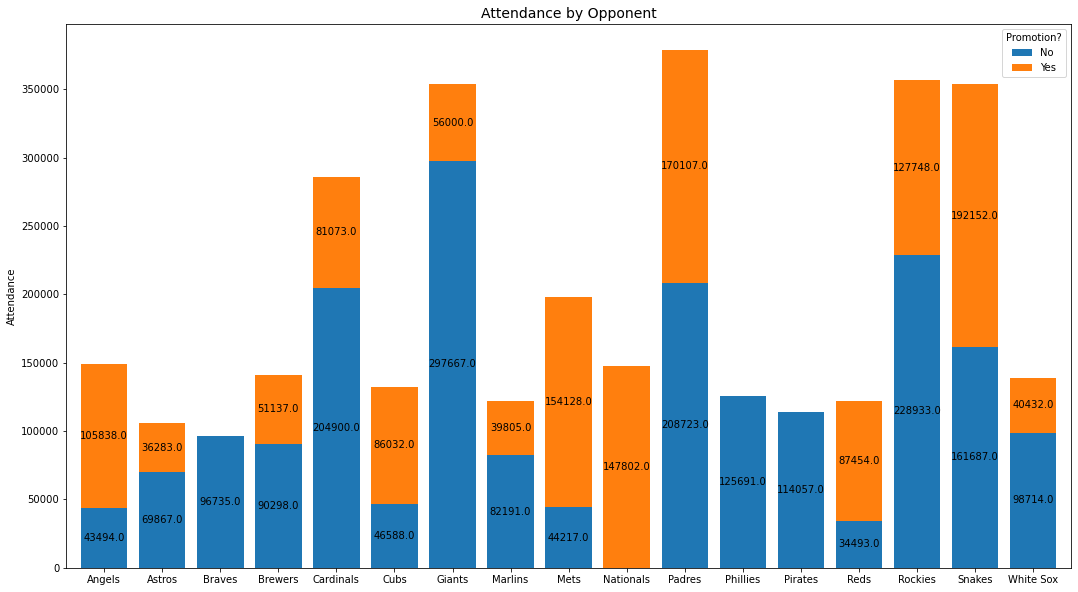

In [20]:
# Plot figure
ax = opponent_games.plot(kind='bar', stacked=True, figsize=(18, 10), rot=0, xlabel='', ylabel='Attendance', width = 0.8)

for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels = labels, label_type='center')
    
ax.legend(labels = ['No', 'Yes'], title = 'Promotion?')
ax.set_title('Attendance by Opponent', fontsize = 14)

The Padres, Rockies, Snakes and Giants all had high attendance records. The Padres were about even for promotions vs no promotions. The others were mostly no promotions except for the Snakes which had slightly better attendance with a promotion.

#### Analysis

I would like to see which promotions along with the month and day of the week have an influence on attendance. I will use the Ordinary Least Squares (OLS) method of linear regression to determine this.

In [21]:
# Drop unneeded columns
model_df = dodgers_df.drop(['day', 'opponent', 'skies', 'day_night', 'temp', 'promotion'], axis = 1)
model_df.head()

,month,attend,day_of_week,cap,shirt,fireworks,bobblehead
0,APR,56000,Tuesday,NO,NO,NO,NO
1,APR,29729,Wednesday,NO,NO,NO,NO
2,APR,28328,Thursday,NO,NO,NO,NO
3,APR,31601,Friday,NO,NO,YES,NO
4,APR,46549,Saturday,NO,NO,NO,NO


In [22]:
# Change categorical data to dummy variables
categorical_columns = model_df.select_dtypes('object').columns
categorical_columns

Index(['month', 'day_of_week', 'cap', 'shirt', 'fireworks', 'bobblehead'], dtype='object')

In [23]:
model_dummy_df = pd.get_dummies(model_df, columns = categorical_columns, drop_first = True)
print(model_dummy_df.shape)
print(model_dummy_df.columns)

(81, 17)
Index(['attend', 'month_AUG', 'month_JUL', 'month_JUN', 'month_MAY',
       'month_OCT', 'month_SEP', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'cap_YES', 'shirt_YES', 'fireworks_YES',
       'bobblehead_YES'],
      dtype='object')


In [24]:
# Create target and features variables
X = model_dummy_df.drop('attend', axis = 1)
y = model_dummy_df.attend

In [25]:
# Add constant term
X = sm.add_constant(X)

# performing the regression and fitting the model
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6.429
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.87e-08
Time:                        16:55:31   Log-Likelihood:                -806.54
No. Observations:                  81   AIC:                             1647.
Df Residuals:                      64   BIC:                             1688.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.223e+

C:\Users\Osgiliath\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


**Recommendation:**

Looking at the promotions, Fireworks and Bobbleheads both increase attendance. Playing on Sat, Sun, Tues or Weds all are good and also increase attendance.  June is your best month.  For the best attendance record, play a game on a Tuesday in June with Fireworks.